In [ ]:
# install the tensorflow gpu
!pip install tensorflow-gpu

In [ ]:
# import the tensorflow library and check if GPU is enabled
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
# Check for GPU related information
!nvidia-smi

Tue Jun  1 19:18:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    37W / 149W |     58MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import pathlib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create a train dataset(0.8) from the dataset in the image folder.

image_folder="/content/drive/MyDrive/data"

train = tf.keras.preprocessing.image_dataset_from_directory(
image_folder,
validation_split=0.2,
subset="training",
seed=100,
image_size=(180, 180),
batch_size=32)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


In [ ]:
# Create a valid dataset(0.2) from the dataset in the image folder.

valid = tf.keras.preprocessing.image_dataset_from_directory(
image_folder,
validation_split=0.2,
subset="validation",
seed=100,
image_size=(180, 180),
batch_size=32)

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
# print all the classes in the train data
class_names = train.class_names
print(class_names)

['A', 'B', 'C']


In [ ]:
# print all the classes in the test data
class_names_test = valid.class_names
print(class_names_test)

['A', 'B', 'C']


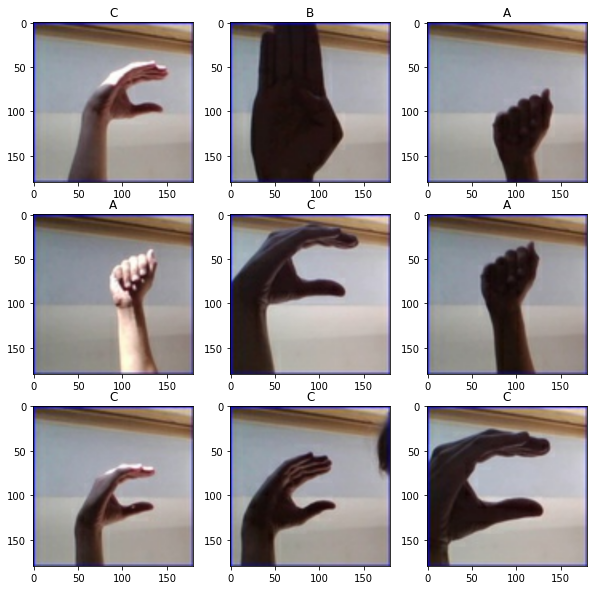

In [ ]:
# Visualize a few signs

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [ ]:
# Developing a CNN architectute sequentially

In [ ]:
# Initialize the model sequentially
model = Sequential([
  # Rescale as per image shape
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),

  # Add 1st convolution layer with 32 kernel and 3X3 kernel size and activation as "relu"
  layers.Conv2D(32, 3, activation='relu'),

  # Add a MaxPooling Layer of size 2X2 
  layers.MaxPooling2D(pool_size=(2, 2)),

  # Add 2nd convolution layer with 32 kernel and 3X3 kernel size and activation as "relu"
  layers.Conv2D(32, 3, activation='relu'),

  # Add a MaxPooling Layer of size 2X2 
  layers.MaxPooling2D(pool_size=(2, 2)),

  # Add 3rd convolution layer with 64 kernel and 3X3 kernel size and activation as "relu"
  layers.Conv2D(64, 3, activation='relu'),

  # Add a MaxPooling Layer of size 2X2 
  layers.MaxPooling2D(pool_size=(2, 2)),

  # Flatten the layer
  layers.Flatten(),

  # Add hidden layer with 128 units activation function as 'relu'
  layers.Dense(128, activation='relu'),

  #Add output layer with units as 3 for each class and activation function as 'softmax'
  layers.Dense(3,activation='softmax')
])

In [ ]:
!pip install keras_sequential_ascii

In [ ]:
# Visualize the CNN architecture flow

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    180  180    3
           Rescaling   ????? -------------------         0     0.0%
                       #####    180  180    3
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####    178  178   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     89   89   32
              Conv2D    \|/  -------------------      9248     0.3%
                relu   #####     87   87   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     43   43   32
              Conv2D    \|/  -------------------     18496     0.6%
                relu   #####     41   41   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     20   20   64
             Flatten   ||||| -------------------         0     0.0%
              

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# Fit the model and run it for 5 epochs

hist = model.fit(
  train,
  validation_data=valid,
  epochs=5
)

Epoch 1/5
75/75 [==============================] - 106s 1s/step - loss: 0.5464 - accuracy: 0.7483 - val_loss: 0.0789 - val_accuracy: 0.9917
Epoch 2/5
75/75 [==============================] - 107s 1s/step - loss: 0.0219 - accuracy: 0.9967 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/5
75/75 [==============================] - 109s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.5668e-04 - val_accuracy: 1.0000
Epoch 4/5
75/75 [==============================] - 106s 1s/step - loss: 2.5507e-04 - accuracy: 1.0000 - val_loss: 3.0065e-04 - val_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 107s 1s/step - loss: 1.5474e-04 - accuracy: 1.0000 - val_loss: 2.0595e-04 - val_accuracy: 1.0000


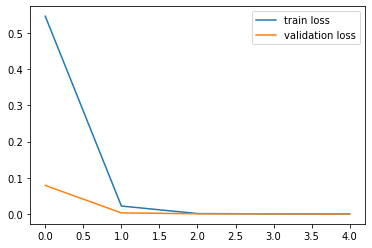

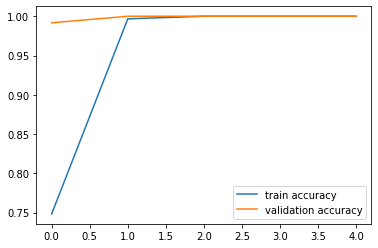

In [ ]:
# plot the loss of train vs validation
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy of train vs validation
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Looks like both train and test are doing a perfect job. The losses have stabilised after 2nd iteration.

In [ ]:
# save the model which is needed during the web app deployment

tf.keras.models.save_model(model,'cnn_sign_classification.hdf5')

In [ ]:
# Install the streamlit package to be used as a frontend for our webapp

!pip install streamlit

In [ ]:
# Scripting app.py to be run

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/cnn_sign_classification.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # American Sign Language Classification(Deep Learning)
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def importimage_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")

else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = importimage_and_predict(image, model)
    class_names=["A","B","C"]
    print_str="Above sign is classified as: "+class_names[np.argmax(predictions)]
    st.success(print_str)

Writing app.py


In [ ]:
# install pyngrok to create a tunnel between local and web.

!pip install pyngrok

     |████████████████████████████████| 747kB 3.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=0cb14bfd37776b1dcc1ccd7e657e9a2c7f9b662f0625f344780bbe4f42b5d82a
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
# authenticate with your token key. Key is masked out

!ngrok authtoken

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# run appy.py on stremlit and nohup

!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
# connect on the local port 8501

from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

2021-06-01 19:32:36.093 INFO    pyngrok.ngrok: Opening tunnel named: http-80-f24e3439-e83c-410c-810e-c54efa49ea81
2021-06-01 19:32:36.148 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="no configuration paths supplied"
2021-06-01 19:32:36.160 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-06-01 19:32:36.162 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-06-01 19:32:36.166 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-06-01 19:32:36.716 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-06-01 19:32:36.723 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:36+0000 lvl=info msg="client session established" obj=csess id=d3a3d2cae8e1
2

<NgrokTunnel: "http://65dde1244547.ngrok.io" -> "http://localhost:80">

2021-06-01 19:32:37.136 INFO    pyngrok.process.ngrok: t=2021-06-01T19:32:37+0000 lvl=info msg=end pg="/api/tunnels/http-80-f24e3439-e83c-410c-810e-c54efa49ea81 (http)" id=fe6581f86fda57ad status=200 dur=220.142µs


In [26]:
# Initialise the tunnel between local and web

!streamlit run --server.port 80 app.py

2021-06-01 19:33:18.902 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
2021-06-01 19:33:19.335632: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.80.38.168:80

2021-06-01 19:33:21.077095: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-01 19:33:21.082732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-01 19:33:21.083489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 

2021-06-01 19:33:33.713 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:33+0000 lvl=info msg="join connections" obj=join id=26de229e671f l=127.0.0.1:80 r=203.192.253.72:40944
2021-06-01 19:33:34.174 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:34+0000 lvl=info msg="join connections" obj=join id=eb5a724ddf5f l=127.0.0.1:80 r=203.192.253.72:40944
2021-06-01 19:33:34.181 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:34+0000 lvl=info msg="join connections" obj=join id=1a35b3d7781e l=127.0.0.1:80 r=203.192.253.72:2678
2021-06-01 19:33:34.426 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:34+0000 lvl=info msg="join connections" obj=join id=d36f2619ddb3 l=127.0.0.1:80 r=203.192.253.72:14630
2021-06-01 19:33:37.780 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:37+0000 lvl=info msg="join connections" obj=join id=f741e65fb9a7 l=127.0.0.1:80 r=203.192.253.72:44580
2021-06-01 19:33:38.276 INFO    pyngrok.process.ngrok: t=2021-06-01T19:33:38+0000 lvl=info msg="join connections" ob

2021-06-01 19:34:04.574946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-06-01 19:34:04.575425: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299995000 Hz


2021-06-01 19:35:34.930 INFO    pyngrok.process.ngrok: t=2021-06-01T19:35:34+0000 lvl=info msg="join connections" obj=join id=c457240721b7 l=127.0.0.1:80 r=203.192.253.72:27203
2021-06-01 19:38:47.037 INFO    pyngrok.process.ngrok: t=2021-06-01T19:38:47+0000 lvl=info msg="join connections" obj=join id=285ee03c808d l=127.0.0.1:80 r=203.192.253.72:56196
2021-06-01 19:38:47.512 INFO    pyngrok.process.ngrok: t=2021-06-01T19:38:47+0000 lvl=info msg="join connections" obj=join id=eb0215636d49 l=127.0.0.1:80 r=203.192.253.72:29933
2021-06-01 19:38:47.641 INFO    pyngrok.process.ngrok: t=2021-06-01T19:38:47+0000 lvl=info msg="join connections" obj=join id=1d6d86fd4a6b l=127.0.0.1:80 r=203.192.253.72:56196
2021-06-01 19:38:56.912 INFO    pyngrok.process.ngrok: t=2021-06-01T19:38:56+0000 lvl=info msg="join connections" obj=join id=bf58399c5fbc l=127.0.0.1:80 r=203.192.253.72:34748
2021-06-01 19:49:28.643 INFO    pyngrok.process.ngrok: t=2021-06-01T19:49:28+0000 lvl=info msg="received stop reque

  Stopping...
  Stopping...
